In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import joblib

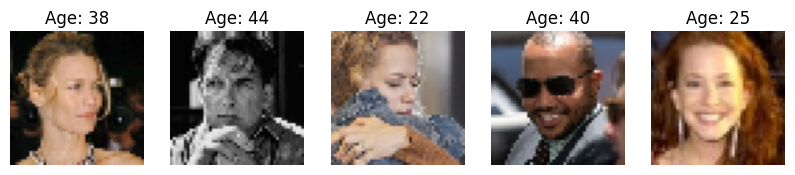

['age_scaler.pkl']

In [7]:
# Function to load data
def load_age_data(folder_path, target_size=(48, 48)):
    data = []
    labels = []

    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = load_img(img_path, target_size=target_size, color_mode="rgb")
                img = img_to_array(img)
                img = img / 255.0  # Normalize image data to [0, 1]
                data.append(img)
                labels.append(int(class_folder))  # Assuming class folders are named with ages

    # Convert lists to NumPy arrays
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Load the training data
train_folder = './Agedata/20-50/20-50/train'
X_train, y_train = load_age_data(train_folder, target_size=(48, 48))

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Load the test data
test_folder = './Agedata/20-50/20-50/test'
X_test, y_test = load_age_data(test_folder, target_size=(48, 48))

# Function to display images
def display_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Age: {labels[i]}")
        plt.axis('off')
    plt.show()

# Display some training images
display_images(X_train, y_train, num_images=5)

# Standardize the age labels
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Save the scaler
joblib.dump(scaler, 'age_scaler.pkl')


In [9]:
# Check the shape of the loaded data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (26745, 48, 48, 3)
y_train shape: (26745,)
X_val shape: (6687, 48, 48, 3)
y_val shape: (6687,)
X_test shape: (7008, 48, 48, 3)
y_test shape: (7008,)


In [10]:
# Build the model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolutional Layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolutional Layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolutional Layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output and feed into a dense layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Output layer for regression
model.add(Dense(1, activation='linear'))  # Predicting a single continuous value (age)

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

model.summary()


C:\Users\Jontes\anaconda3\envs\pythonenv311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,02

 Total params: 4,342,913 (16.57 MB)

 Trainable params: 4,339,969 (16.56 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [11]:
# Callbacks
checkpoint = ModelCheckpoint("./age_model_best.keras", monitor='val_mae', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stopping, reduce_learningrate]
)

Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2.1240 - mae: 1.1133
Epoch 1: val_mae improved from inf to 0.85453, saving model to ./age_model_best.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - loss: 2.1209 - mae: 1.1126 - val_loss: 0.9809 - val_mae: 0.8545 - learning_rate: 0.0010
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1.1052 - mae: 0.8811
Epoch 2: val_mae improved from 0.85453 to 0.85002, saving model to ./age_model_best.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - loss: 1.1051 - mae: 0.8811 - val_loss: 0.9801 - val_mae: 0.8500 - learning_rate: 0.0010
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1.0300 - mae: 0.8587
Epoch 3: val_mae improved from 0.85002 to 0.83563, saving model to ./age_model_best.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - loss: 1.0299 - mae: 0.8586 - val_loss: 0.9521 - val_mae: 0.8356 - learning_rate: 0.0010
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.9674 - mae: 0.8353
Epoch 4: val_mae i

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - loss: 1.0881 - mae: 0.8953
Test Mean Absolute Error: 0.7389741539955139
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step


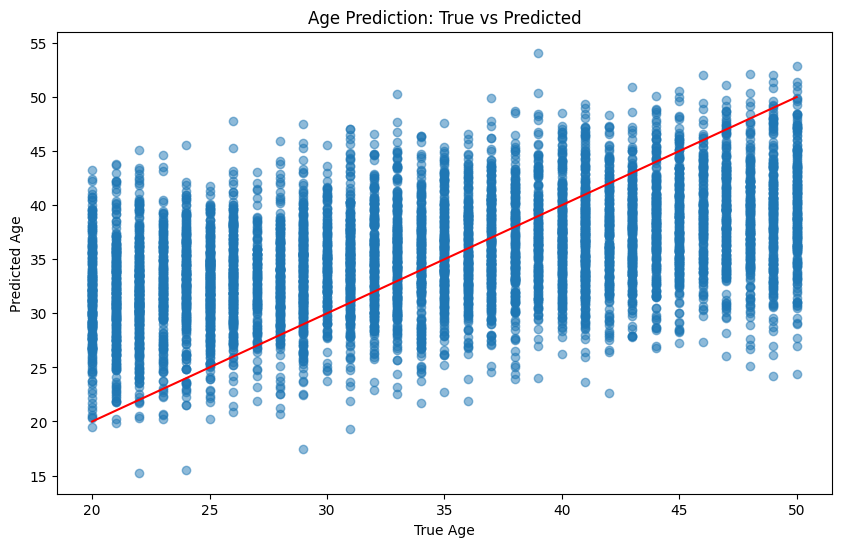

In [12]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Load the best model
best_model = load_model('./age_model_best.keras')

# Predict on the test set
y_pred = best_model.predict(X_test)

# Inverse the scaling to get the actual ages
y_pred_actual = scaler.inverse_transform(y_pred).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('Age Prediction: True vs Predicted')
plt.show()


This setup is similar to my emotion classifier, but it is tailored for age prediction. The key differences include splitting the training data into training and validation sets, using a regression output layer (with one neuron and a linear activation function), and evaluating using Mean Absolute Error (MAE).

In [ ]:
print(best_model)